# The Dataset with Categorial Columns or Variables

- The previous dataset (Chapter4.csv) was easy for correlation analysis because all the variables or columns in the dataset are numbers
- When correlation analysis is done with the data with categorical columns, special care is needed

#### Jordan Martin
"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

# Data description (Titanic)

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Question 1: read data
df = pd.read_csv("titanic_train.csv")

In [3]:
# Question 2: Please remove unimportant columns ... Ticket #s mean nothing ... too many missing values in Cabin ...
# in addition to those outlined in the question, I removed Name and PassengerId as they both are essentially random
# and unimportant to the actual data
df = df.drop(columns=["Ticket","Cabin","PassengerId","Name"])

In [4]:
# Question 3: remove the rows with missing age 
df = df.dropna(axis=0, subset=['Age'])

In [5]:
# Question 4: find out missing values again
# this will gather all rows with any missing values
df1 = df[df.isna().any(axis=1)]
print(df1)

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN


In [6]:
# For these two missing values, we might as well also delete them because we don't know their embarked status
df = df.dropna(axis=0, subset=['Embarked'])

In [7]:
# Question 5: Data Description
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
# Question 6: unique values in Sex column ... groupby
# I chose not to use groupby and used unique to get the unique sexes
print(df['Sex'].unique())

['male' 'female']


In [9]:
# Question 7: correlation analysis of current data
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


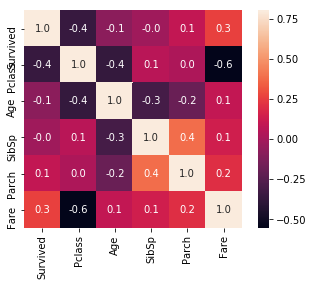

In [10]:
# Question 8: heatmap of correlation
# http://stanford.edu/~mwaskom/software/seaborn/tutorial/quantitative_linear_models.html#plotting-many-pairwise-relationships-with-corrplot
# NOTE: The above link does not exist
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [11]:
# Question 9: find out unique values in Embarked ... groupby
# Again, I chose to use unique rather than groupby for simplicity
print(df['Embarked'].unique())

['S' 'C' 'Q']


In [12]:
# Question 10: replace (C to 1, Q to 2, S to 3)
df['Embarked'] = df['Embarked'].map({'C':1,'Q': 2,'S':3})

In [13]:
# Question 11: replace (male to 1, female to 0)
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [14]:
# Question 12: so let's convert object to numerical
# At this point all of the objects have been converted to numerical or removed, so nothing to do here!
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.356462 -0.536762 -0.082446 -0.015523  0.095265   
Pclass   -0.356462  1.000000  0.150826 -0.365902  0.065187  0.023666   
Sex      -0.536762  0.150826  1.000000  0.099037 -0.106296 -0.249543   
Age      -0.082446 -0.365902  0.099037  1.000000 -0.307351 -0.187896   
SibSp    -0.015523  0.065187 -0.106296 -0.307351  1.000000  0.383338   
Parch     0.095265  0.023666 -0.249543 -0.187896  0.383338  1.000000   
Fare      0.266100 -0.552893 -0.182457  0.093143  0.139860  0.206624   
Embarked -0.181979  0.244145  0.109639 -0.032565  0.033064  0.011803   

              Fare  Embarked  
Survived  0.266100 -0.181979  
Pclass   -0.552893  0.244145  
Sex      -0.182457  0.109639  
Age       0.093143 -0.032565  
SibSp     0.139860  0.033064  
Parch     0.206624  0.011803  
Fare      1.000000 -0.283510  
Embarked -0.283510  1.000000  


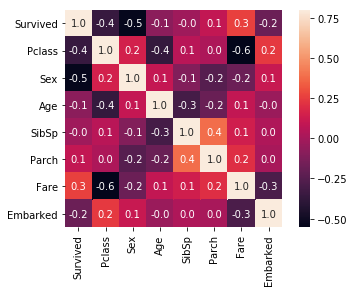

In [15]:
# Question 13: correlation analysis again
print(df.corr())
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [16]:
# Question 14: Summarize your findings

For this analysis, I will consider correlation values between -0.3 to 0.3 as uncorrelated, any values 0.3 to 0.5 positively correlated, any values -0.5 to -0.3 negatively correlated, any values above 0.5 strongly positively correlated and any values below -0.5 as strongly negatively correlated. 

There were two relationshipts that were strongly negatively correlated. Sex was strongly negatively correlated with survival and passenger class was strongly negatively correlated with fare. Both of these make sense as causal relationships. Because first class was nicer than second and third class, it makes sense that its fare would be greater. Also, because women and children were saved first on the Titanic, it makes sense that being a woman would increase your chance of survival. 

There were four relationships that were just negatively correlated. Passenger class and survival, passenger class and age, age and siblings aboard and fare and where they embarked from. Passenger class and survival are likely causal because lower numbered class, i.e. first class were usually deemed more important and more likely to be saved. Passenger class and age is also likely causal as older people generally have more money and can afford better classes. Age and siblings aboard is also causal as younger people (i.e. kids) tend to travel with their family more. Finally, fare and the location embarked from is also likely causal as longer trips should cost more.

There were many relationships that didn't appear to be correlated. All of those not listed below I ddemed uncorrelated.

There were two relationships that were just positively correlated. Fare and survival and siblings aboard and parents aboard. Fare and survival is likely a causal relationship as those that paid more were higher class and therefore were treated better as the ship sank. Just as age and siblings aboard was likely causal due to families traveling together, if you're with your siblings as a kid, you're likely also with your parents.

Finally, there were no strongly positively correlated relationships.